In [1]:
#SIMULATION CARA EUT MEN (I/III)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

coir = 0.10  
cap = 700 
deductibles = [300, 500, 1000, 1500, 2000, 2500]
premiums = [5440, 5300, 4950, 4600, 4250, 3900]
risk_aversions = np.linspace(0.0001, 0.0020, 20)

def load_probabilities(file_path):
    profiles = {}
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name, index_col=0)  
        profiles[sheet_name] = df  
    return profiles

def calculate_oopc(mhc, deductible):
    return min(mhc, deductible + (mhc - deductible) * coir, deductible + cap)

def calculate_wealth(initial_wealth, premium, mhc, deductible):
    oopc = calculate_oopc(mhc, deductible)
    return initial_wealth - (premium + oopc)

def cara_utility(wealth, risk_aversion):
    return 1 - np.exp(-risk_aversion * wealth)

def expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion):
    utilities = []
    
    for mhc, prob in zip(health_costs, probabilities):
        out_of_pocket = min(mhc, deductible + (mhc - deductible) * 0.1, deductible + cap)
        
        wealth = initial_wealth - premium - out_of_pocket
        
        utility = 1 - np.exp(-risk_aversion * wealth)
        
        utilities.append(prob * utility)
    
    return sum(utilities)

def find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities):
    optimal_deductible = None
    max_utility = -np.inf
    for deductible, premium in zip(deductibles, premiums):
        utility = expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion)
        if utility > max_utility:
            max_utility = utility
            optimal_deductible = deductible
    return optimal_deductible

def calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000):
    results = {}  
    
    for profile_name, df in profiles.items():
        profile_results = {}
        
        for age_group in df.index:
            probabilities = df.loc[age_group].values / 100  
            age_group_results = []
            
            for risk_aversion in risk_aversions:
                optimal_deductible = find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities)
                age_group_results.append((risk_aversion, optimal_deductible))
            
            profile_results[age_group] = age_group_results
        
        results[profile_name] = profile_results
    
    return results

file_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Experiment\DataMenPythonSimulation.xlsx'
profiles = load_probabilities(file_path)
health_costs = [0, 250, 750, 1500, 3500, 7500, 15000, 35000, 50000]

# You can adjust the initial wealth by providing a different value here.
optimal_deductible_results = calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000)

for profile_name, profile_data in optimal_deductible_results.items():
    print(f"Profile: {profile_name}")
    for age_group, results in profile_data.items():
        print(f"  Age Group: {age_group}")
        for risk_aversion, deductible in results:
            print(f"    Risk Aversion: {risk_aversion:.4f}, Optimal Deductible: CHF {deductible}")
    print("\n")





Profile: Männer (H0 und C0)
  Age Group: 16-20
    Risk Aversion: 0.0001, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0002, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0003, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0004, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0005, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0006, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0007, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0008, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0009, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0010, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0011, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0012, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0013, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0014, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0015, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0016, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0017, Optimal Deductible: CHF 2000
 

In [5]:
#SIMULATION CARA EUT MEN (II/III)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

coir = 0.10  
cap = 700    
deductibles = [300, 500, 1000, 1500, 2000, 2500]
premiums = [5440, 5300, 4950, 4600, 4250, 3900]
risk_aversions = np.linspace(0.0001, 0.0020, 20)  # Range of risk aversion levels

def load_probabilities(file_path):
    profiles = {}
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name, index_col=0)  
        profiles[sheet_name] = df  
    return profiles

def calculate_oopc(mhc, deductible):
    return min(mhc, deductible + (mhc - deductible) * coir, deductible + cap)

def calculate_wealth(initial_wealth, premium, mhc, deductible):
    oopc = calculate_oopc(mhc, deductible)
    return initial_wealth - (premium + oopc)

def cara_utility(wealth, risk_aversion):
    return 1 - np.exp(-risk_aversion * wealth)

def expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion):
    utilities = []
    
    for mhc, prob in zip(health_costs, probabilities):
        out_of_pocket = min(mhc, deductible + (mhc - deductible) * 0.1, deductible + cap)
        
        wealth = initial_wealth - premium - out_of_pocket
       
        utility = 1 - np.exp(-risk_aversion * wealth)
        
        utilities.append(prob * utility)
    
    return sum(utilities)

def find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities):
    optimal_deductible = None
    max_utility = -np.inf
    utilities_dict = {}  

    for deductible, premium in zip(deductibles, premiums):
        utility = expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion)
        utilities_dict[deductible] = utility
        
        if utility >= max_utility:
            max_utility = utility
            optimal_deductible = deductible

    print(f"Risk Aversion: {risk_aversion:.4f}")
    for deductible, utility in utilities_dict.items():
        print(f"  Deductible: CHF {deductible}, Utility: {utility:.10f}")
    print(f"  Optimal Deductible: CHF {optimal_deductible}, Max Utility: {max_utility:.10f}\n")

    return optimal_deductible

def calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000):
    results = {} 
    
    for profile_name, df in profiles.items():
        profile_results = {}
        
        for age_group in df.index:
            probabilities = df.loc[age_group].values / 100 
            age_group_results = []
            
            for risk_aversion in risk_aversions:
                optimal_deductible = find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities)
                age_group_results.append((risk_aversion, optimal_deductible))
            
            profile_results[age_group] = age_group_results
        
        results[profile_name] = profile_results
    
    return results

file_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Experiment\DataMenPythonSimulation.xlsx'
profiles = load_probabilities(file_path)
health_costs = [0, 250, 750, 1500, 3500, 7500, 15000, 35000, 50000]  # Given health cost realizations

optimal_deductible_results = calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000)

for profile_name, profile_data in optimal_deductible_results.items():
    print(f"Profile: {profile_name}")
    for age_group, results in profile_data.items():
        print(f"  Age Group: {age_group}")
        for risk_aversion, deductible in results:
            print(f"    Risk Aversion: {risk_aversion:.4f}, Optimal Deductible: CHF {deductible}")
    print("\n")





Risk Aversion: 0.0001
  Deductible: CHF 300, Utility: 0.0034655905
  Deductible: CHF 500, Utility: 0.0035037008
  Deductible: CHF 1000, Utility: 0.0036196503
  Deductible: CHF 1500, Utility: 0.0037530386
  Deductible: CHF 2000, Utility: 0.0039214271
  Deductible: CHF 2500, Utility: 0.0040835363
  Optimal Deductible: CHF 2500, Max Utility: 0.0040835363

Risk Aversion: 0.0002
  Deductible: CHF 300, Utility: 0.0057276010
  Deductible: CHF 500, Utility: 0.0057755481
  Deductible: CHF 1000, Utility: 0.0059187576
  Deductible: CHF 1500, Utility: 0.0060786262
  Deductible: CHF 2000, Utility: 0.0062794228
  Deductible: CHF 2500, Utility: 0.0064652855
  Optimal Deductible: CHF 2500, Max Utility: 0.0064652855

Risk Aversion: 0.0003
  Deductible: CHF 300, Utility: 0.0072048298
  Deductible: CHF 500, Utility: 0.0072500272
  Deductible: CHF 1000, Utility: 0.0073825501
  Deductible: CHF 1500, Utility: 0.0075259948
  Deductible: CHF 2000, Utility: 0.0077057941
  Deductible: CHF 2500, Utility: 0.00786

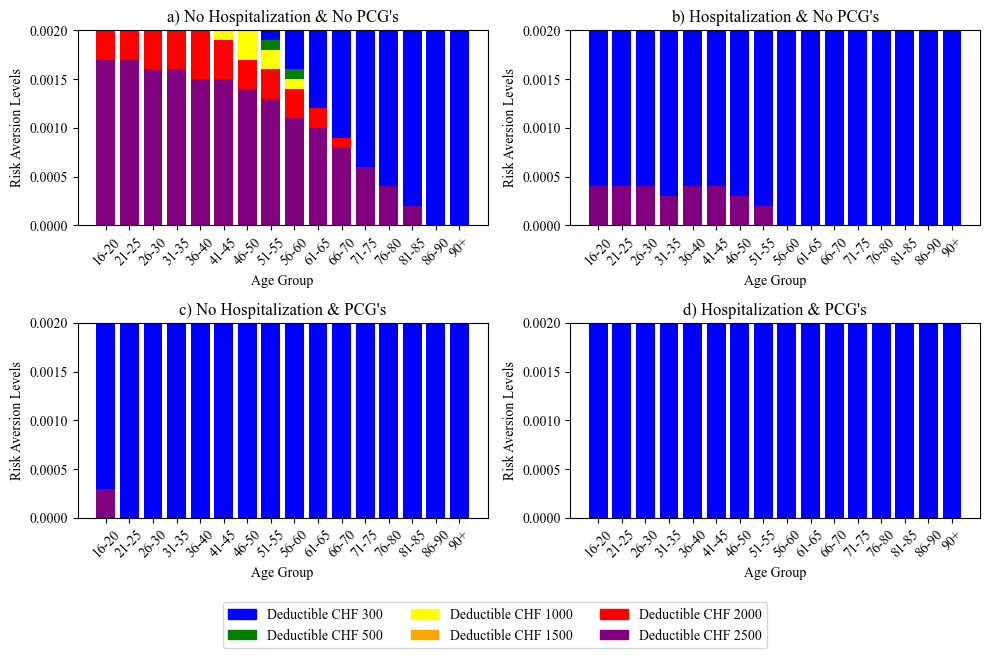

In [4]:
#SIMULATION CARA EUT MEN

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']= 'Times New Roman'
# Define colors for each deductible
colors = {300: 'blue', 500: 'green', 1000: 'yellow', 1500: 'orange', 2000: 'red', 2500: 'purple'}

def plot_optimal_deductibles(results):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    profile_names = list(results.keys())
    profile_titles = ["a) No Hospitalization & No PCG's", "b) Hospitalization & No PCG's", 
                      "c) No Hospitalization & PCG's", "d) Hospitalization & PCG's"]
    
    # Define y-axis ticks for 0.0001 steps
    y_ticks = np.arange(0.0000, 0.0021, 0.0005)
    
    # Iterate over each profile
    for i, profile_name in enumerate(profile_names):
        ax = axs[i // 2, i % 2]
        
        profile_data = results[profile_name]
        age_groups = list(profile_data.keys())
        
        # For each age group, plot the optimal deductible levels across risk aversion levels
        for age_index, age_group in enumerate(age_groups):
            age_group_results = profile_data[age_group]
            bottom = 0  # Start at the lowest risk aversion level
            
            # Iterate through risk aversion levels, grouping by consecutive segments with the same deductible
            current_deductible = None
            segment_start = 0
            
            for j in range(len(age_group_results)):
                risk_aversion, optimal_deductible = age_group_results[j]
                
                # Check if the deductible changes or we are at the last risk aversion level
                if optimal_deductible != current_deductible or j == len(age_group_results) - 1:
                    if current_deductible is not None:
                        # Calculate the height of the segment
                        segment_end = risk_aversion if j < len(age_group_results) - 1 else risk_aversion + (risk_aversions[1] - risk_aversions[0])
                        height = segment_end - segment_start
                        
                        # Plot the segment
                        ax.bar(age_index, height, bottom=segment_start, color=colors[current_deductible], edgecolor="none")
                        segment_start = segment_end
                    
                    # Update the current deductible
                    current_deductible = optimal_deductible
            
            # Move up for the next segment
            bottom += height

        # Customize the plot
        ax.set_title(profile_titles[i])
        ax.set_xlabel("Age Group")
        ax.set_ylabel("Risk Aversion Levels")
        ax.set_xticks(range(len(age_groups)))
        ax.set_xticklabels(age_groups, rotation=45)
        ax.set_ylim(0, 0.002)  # Set limit from 0.0000 to 0.0020 for risk aversion levels
        ax.set_yticks(y_ticks)  # Set y-axis ticks to 0.0001 steps
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))  # Format y-axis labels to four decimal places

    # Add a legend outside the subplots
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
    labels = [f'Deductible CHF {ded}' for ded in colors.keys()]
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()

# Call the plot function with the results from calculate_optimal_deductibles
save_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Abbildungen\SimulationCARAMen.png'
plot_optimal_deductibles(optimal_deductible_results)


In [3]:
#SIMULATION CARA EUT WOMEN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
coir = 0.10  # Co-insurance rate
cap = 700    # Co-insurance cap
deductibles = [300, 500, 1000, 1500, 2000, 2500]
premiums = [5440, 5300, 4950, 4600, 4250, 3900]
risk_aversions = np.linspace(0.0001, 0.0020, 20)  # Range of risk aversion levels

# Function to load probabilities from Excel
def load_probabilities(file_path):
    profiles = {}
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name, index_col=0)  # Read each sheet with age groups as the index
        profiles[sheet_name] = df  # Store the entire dataframe for each profile
    return profiles

# Functions for oopc, wealth, CARA utility, expected utility, and finding optimal deductible
def calculate_oopc(mhc, deductible):
    return min(mhc, deductible + (mhc - deductible) * coir, deductible + cap)

def calculate_wealth(initial_wealth, premium, mhc, deductible):
    oopc = calculate_oopc(mhc, deductible)
    return initial_wealth - (premium + oopc)

def cara_utility(wealth, risk_aversion):
    return 1 - np.exp(-risk_aversion * wealth)

def expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion):
    utilities = []
    
    for mhc, prob in zip(health_costs, probabilities):
        # Calculate out-of-pocket costs using the formula min(mhc, d + (mhc - d) * 0.1, d + 700)
        out_of_pocket = min(mhc, deductible + (mhc - deductible) * 0.1, deductible + cap)
        
        # Calculate wealth after insurance costs: wi - pd - out_of_pocket
        wealth = initial_wealth - premium - out_of_pocket
        
        # Calculate CARA utility: 1 - e^(-a * wealth)
        utility = 1 - np.exp(-risk_aversion * wealth)
        
        # Weight by probability and add to utilities list
        utilities.append(prob * utility)
    
    # Return the sum of weighted utilities, which is the expected utility
    return sum(utilities)

def find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities):
    optimal_deductible = None
    max_utility = -np.inf
    for deductible, premium in zip(deductibles, premiums):
        utility = expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion)
        if utility > max_utility:
            max_utility = utility
            optimal_deductible = deductible
    return optimal_deductible

# Function to calculate optimal deductibles and return results
def calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000):
    results = {}  # Dictionary to store results
    
    for profile_name, df in profiles.items():
        profile_results = {}
        
        for age_group in df.index:
            probabilities = df.loc[age_group].values / 100  # Convert from percentage to probability
            age_group_results = []
            
            for risk_aversion in risk_aversions:
                optimal_deductible = find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities)
                age_group_results.append((risk_aversion, optimal_deductible))
            
            profile_results[age_group] = age_group_results
        
        results[profile_name] = profile_results
    
    return results

# Main execution
file_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Experiment\DataWomenPythonSimulation.xlsx'
profiles = load_probabilities(file_path)
health_costs = [0, 250, 750, 1500, 3500, 7500, 15000, 35000, 50000]  # Given health cost realizations

# Calculate optimal deductibles with adjustable initial wealth
# You can adjust the initial wealth by providing a different value here.
optimal_deductible_results = calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000)

# Example: Print the results for inspection
for profile_name, profile_data in optimal_deductible_results.items():
    print(f"Profile: {profile_name}")
    for age_group, results in profile_data.items():
        print(f"  Age Group: {age_group}")
        for risk_aversion, deductible in results:
            print(f"    Risk Aversion: {risk_aversion:.4f}, Optimal Deductible: CHF {deductible}")
    print("\n")





Profile: Frauen (H0 und C0)
  Age Group: 16-20
    Risk Aversion: 0.0001, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0002, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0003, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0004, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0005, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0006, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0007, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0008, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0009, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0010, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0011, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0012, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0013, Optimal Deductible: CHF 2500
    Risk Aversion: 0.0014, Optimal Deductible: CHF 2000
    Risk Aversion: 0.0015, Optimal Deductible: CHF 2000
    Risk Aversion: 0.0016, Optimal Deductible: CHF 2000
    Risk Aversion: 0.0017, Optimal Deductible: CHF 300
  

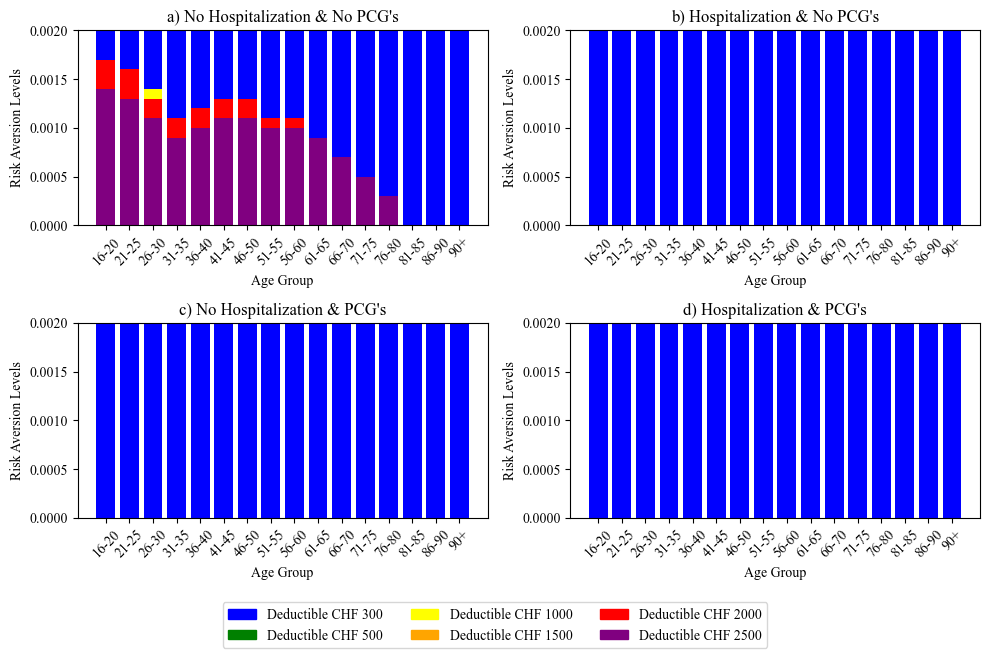

In [4]:
#SIMULATION CARA EUT WOMEN

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']= 'Times New Roman'
# Define colors for each deductible
colors = {300: 'blue', 500: 'green', 1000: 'yellow', 1500: 'orange', 2000: 'red', 2500: 'purple'}

def plot_optimal_deductibles(results):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    profile_names = list(results.keys())
    profile_titles = ["a) No Hospitalization & No PCG's", "b) Hospitalization & No PCG's", 
                      "c) No Hospitalization & PCG's", "d) Hospitalization & PCG's"]
    
    # Define y-axis ticks for 0.0001 steps
    y_ticks = np.arange(0.0000, 0.0021, 0.0005)
    
    # Iterate over each profile
    for i, profile_name in enumerate(profile_names):
        ax = axs[i // 2, i % 2]
        
        profile_data = results[profile_name]
        age_groups = list(profile_data.keys())
        
        # For each age group, plot the optimal deductible levels across risk aversion levels
        for age_index, age_group in enumerate(age_groups):
            age_group_results = profile_data[age_group]
            bottom = 0  # Start at the lowest risk aversion level
            
            # Iterate through risk aversion levels, grouping by consecutive segments with the same deductible
            current_deductible = None
            segment_start = 0
            
            for j in range(len(age_group_results)):
                risk_aversion, optimal_deductible = age_group_results[j]
                
                # Check if the deductible changes or we are at the last risk aversion level
                if optimal_deductible != current_deductible or j == len(age_group_results) - 1:
                    if current_deductible is not None:
                        # Calculate the height of the segment
                        segment_end = risk_aversion if j < len(age_group_results) - 1 else risk_aversion + (risk_aversions[1] - risk_aversions[0])
                        height = segment_end - segment_start
                        
                        # Plot the segment
                        ax.bar(age_index, height, bottom=segment_start, color=colors[current_deductible], edgecolor="none")
                        segment_start = segment_end
                    
                    # Update the current deductible
                    current_deductible = optimal_deductible
            
            # Move up for the next segment
            bottom += height

        # Customize the plot
        ax.set_title(profile_titles[i])
        ax.set_xlabel("Age Group")
        ax.set_ylabel("Risk Aversion Levels")
        ax.set_xticks(range(len(age_groups)))
        ax.set_xticklabels(age_groups, rotation=45)
        ax.set_ylim(0, 0.002)  # Set limit from 0.0000 to 0.0020 for risk aversion levels
        ax.set_yticks(y_ticks)  # Set y-axis ticks to 0.0001 steps
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))  # Format y-axis labels to four decimal places

    # Add a legend outside the subplots
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
    labels = [f'Deductible CHF {ded}' for ded in colors.keys()]
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()

# Call the plot function with the results from calculate_optimal_deductibles
save_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Abbildungen\SimulationCARAWomen.png'
plot_optimal_deductibles(optimal_deductible_results)

    

In [9]:
# SIMULATION CRRA EUT MEN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
coir = 0.10  # Co-insurance rate
cap = 700    # Co-insurance cap
deductibles = [300, 500, 1000, 1500, 2000, 2500]
premiums = [5440, 5300, 4950, 4600, 4250, 3900]
risk_aversions = np.linspace(0, 4, 21)  # Range of CRRA risk aversion levels

# Function to load probabilities from Excel
def load_probabilities(file_path):
    profiles = {}
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name, index_col=0)  # Read each sheet with age groups as the index
        profiles[sheet_name] = df  # Store the entire dataframe for each profile
    return profiles

# Functions for calculating out-of-pocket costs, wealth, CRRA utility, expected utility, and finding optimal deductible
def calculate_oopc(mhc, deductible):
    return min(mhc, deductible + (mhc - deductible) * coir, deductible + cap)

def calculate_wealth(initial_wealth, premium, mhc, deductible):
    oopc = calculate_oopc(mhc, deductible)
    return initial_wealth - (premium + oopc)

def crra_utility(wealth, risk_aversion):
    """
    Calculate CRRA utility given wealth and risk aversion parameter.
    
    Parameters:
    wealth (float): The individual's wealth.
    risk_aversion (float): The CRRA risk aversion parameter (b).
    
    Returns:
    float: The utility value.
    """
    if risk_aversion == 1:
        return np.log(wealth)  # Log utility case when b = 1
    else:
        return (wealth**(1 - risk_aversion) - 1) / (1 - risk_aversion)

def expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion):
    """
    Calculate the expected utility using CRRA utility.
    """
    utilities = []
    
    for mhc, prob in zip(health_costs, probabilities):
        # Calculate out-of-pocket costs using the formula min(mhc, d + (mhc - d) * 0.1, d + 700)
        out_of_pocket = min(mhc, deductible + (mhc - deductible) * 0.1, deductible + cap)
        
        # Calculate wealth after insurance costs: initial_wealth - premium - out_of_pocket
        wealth = initial_wealth - premium - out_of_pocket
        
        # Calculate CRRA utility based on remaining wealth
        utility = crra_utility(wealth, risk_aversion)
        
        # Weight by probability and add to utilities list
        utilities.append(prob * utility)
    
    # Return the sum of weighted utilities, which is the expected utility
    return sum(utilities)

def find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities):
    """
    Find the deductible that maximizes expected CRRA utility for a given risk aversion level.
    """
    optimal_deductible = None
    max_utility = -np.inf
    for deductible, premium in zip(deductibles, premiums):
        utility = expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion)
        if utility > max_utility:
            max_utility = utility
            optimal_deductible = deductible
    return optimal_deductible

# Function to calculate optimal deductibles and return results
def calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000):
    results = {}  # Dictionary to store results
    
    for profile_name, df in profiles.items():
        profile_results = {}
        
        for age_group in df.index:
            probabilities = df.loc[age_group].values / 100  # Convert from percentage to probability
            age_group_results = []
            
            for risk_aversion in risk_aversions:
                optimal_deductible = find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities)
                age_group_results.append((risk_aversion, optimal_deductible))
            
            profile_results[age_group] = age_group_results
        
        results[profile_name] = profile_results
    
    return results

# Main execution
file_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Experiment\DataMenPythonSimulation.xlsx'
profiles = load_probabilities(file_path)
health_costs = [0, 250, 750, 1500, 3500, 7500, 15000, 35000, 50000]  # Given health cost realizations

# Calculate optimal deductibles with adjustable initial wealth
# You can adjust the initial wealth by providing a different value here.
optimal_deductible_results = calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000)

# Example: Print the results for inspection
for profile_name, profile_data in optimal_deductible_results.items():
    print(f"Profile: {profile_name}")
    for age_group, results in profile_data.items():
        print(f"  Age Group: {age_group}")
        for risk_aversion, deductible in results:
            print(f"    Risk Aversion: {risk_aversion:.4f}, Optimal Deductible: CHF {deductible}")
    print("\n")


Profile: Männer (H0 und C0)
  Age Group: 16-20
    Risk Aversion: 0.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 3.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 3.2000, Optimal Deductible: CHF 2500
 

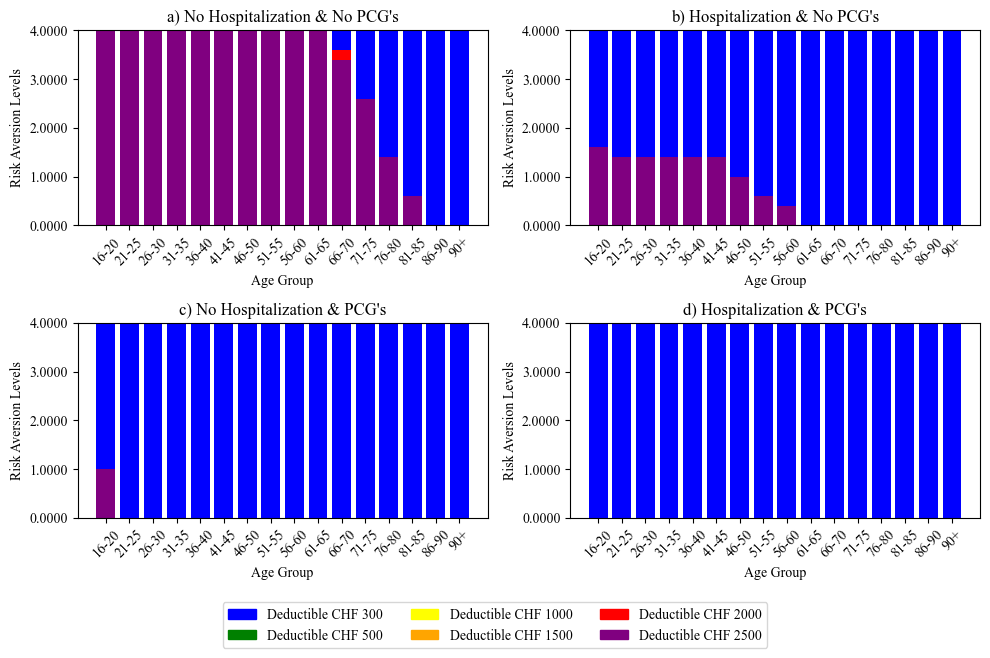

In [10]:
#SIMULATION CRRA EUT MEN

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']= 'Times New Roman'
# Define colors for each deductible
colors = {300: 'blue', 500: 'green', 1000: 'yellow', 1500: 'orange', 2000: 'red', 2500: 'purple'}

def plot_optimal_deductibles(results):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    profile_names = list(results.keys())
    profile_titles = ["a) No Hospitalization & No PCG's", "b) Hospitalization & No PCG's", 
                      "c) No Hospitalization & PCG's", "d) Hospitalization & PCG's"]
    
    # Define y-axis ticks for 0.01 steps
    y_ticks = np.arange(0.0, 4.2, 1)
    
    # Iterate over each profile
    for i, profile_name in enumerate(profile_names):
        ax = axs[i // 2, i % 2]
        
        profile_data = results[profile_name]
        age_groups = list(profile_data.keys())
        
        # For each age group, plot the optimal deductible levels across risk aversion levels
        for age_index, age_group in enumerate(age_groups):
            age_group_results = profile_data[age_group]
            bottom = 0  # Start at the lowest risk aversion level
            
            # Iterate through risk aversion levels, grouping by consecutive segments with the same deductible
            current_deductible = None
            segment_start = 0
            
            for j in range(len(age_group_results)):
                risk_aversion, optimal_deductible = age_group_results[j]
                
                # Check if the deductible changes or we are at the last risk aversion level
                if optimal_deductible != current_deductible or j == len(age_group_results) - 1:
                    if current_deductible is not None:
                        # Calculate the height of the segment
                        segment_end = risk_aversion if j < len(age_group_results) - 1 else risk_aversion + (risk_aversions[1] - risk_aversions[0])
                        height = segment_end - segment_start
                        
                        # Plot the segment
                        ax.bar(age_index, height, bottom=segment_start, color=colors[current_deductible], edgecolor="none")
                        segment_start = segment_end
                    
                    # Update the current deductible
                    current_deductible = optimal_deductible
            
            # Move up for the next segment
            bottom += height

        # Customize the plot
        ax.set_title(profile_titles[i])
        ax.set_xlabel("Age Group")
        ax.set_ylabel("Risk Aversion Levels")
        ax.set_xticks(range(len(age_groups)))
        ax.set_xticklabels(age_groups, rotation=45)
        ax.set_ylim(0, 0.002)  # Set limit from 0.0000 to 0.0020 for risk aversion levels
        ax.set_yticks(y_ticks)  # Set y-axis ticks to 0.0001 steps
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))  # Format y-axis labels to four decimal places

    # Add a legend outside the subplots
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
    labels = [f'Deductible CHF {ded}' for ded in colors.keys()]
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    plt.tight_layout()
    
    if save_path: 
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()

# Call the plot function with the results from calculate_optimal_deductibles
save_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Abbildungen\SimulationCRRAMen.png'
plot_optimal_deductibles(optimal_deductible_results)


In [18]:
# SIMULATION CRRA EUT WOMEN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
coir = 0.10  # Co-insurance rate
cap = 700    # Co-insurance cap
deductibles = [300, 500, 1000, 1500, 2000, 2500]
premiums = [5440, 5300, 4950, 4600, 4250, 3900]
risk_aversions = np.linspace(0, 4, 21)  # Range of CRRA risk aversion levels

# Function to load probabilities from Excel
def load_probabilities(file_path):
    profiles = {}
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name, index_col=0)  # Read each sheet with age groups as the index
        profiles[sheet_name] = df  # Store the entire dataframe for each profile
    return profiles

# Functions for calculating out-of-pocket costs, wealth, CRRA utility, expected utility, and finding optimal deductible
def calculate_oopc(mhc, deductible):
    return min(mhc, deductible + (mhc - deductible) * coir, deductible + cap)

def calculate_wealth(initial_wealth, premium, mhc, deductible):
    oopc = calculate_oopc(mhc, deductible)
    return initial_wealth - (premium + oopc)

def crra_utility(wealth, risk_aversion):
    """
    Calculate CRRA utility given wealth and risk aversion parameter.
    
    Parameters:
    wealth (float): The individual's wealth.
    risk_aversion (float): The CRRA risk aversion parameter (b).
    
    Returns:
    float: The utility value.
    """
    if risk_aversion == 1:
        return np.log(wealth)  # Log utility case when b = 1
    else:
        return (wealth**(1 - risk_aversion) - 1) / (1 - risk_aversion)

def expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion):
    """
    Calculate the expected utility using CRRA utility.
    """
    utilities = []
    
    for mhc, prob in zip(health_costs, probabilities):
        # Calculate out-of-pocket costs using the formula min(mhc, d + (mhc - d) * 0.1, d + 700)
        out_of_pocket = min(mhc, deductible + (mhc - deductible) * 0.1, deductible + cap)
        
        # Calculate wealth after insurance costs: initial_wealth - premium - out_of_pocket
        wealth = initial_wealth - premium - out_of_pocket
        
        # Calculate CRRA utility based on remaining wealth
        utility = crra_utility(wealth, risk_aversion)
        
        # Weight by probability and add to utilities list
        utilities.append(prob * utility)
    
    # Return the sum of weighted utilities, which is the expected utility
    return sum(utilities)

def find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities):
    """
    Find the deductible that maximizes expected CRRA utility for a given risk aversion level.
    """
    optimal_deductible = None
    max_utility = -np.inf
    for deductible, premium in zip(deductibles, premiums):
        utility = expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion)
        if utility > max_utility:
            max_utility = utility
            optimal_deductible = deductible
    return optimal_deductible

# Function to calculate optimal deductibles and return results
def calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000):
    results = {}  # Dictionary to store results
    
    for profile_name, df in profiles.items():
        profile_results = {}
        
        for age_group in df.index:
            probabilities = df.loc[age_group].values / 100  # Convert from percentage to probability
            age_group_results = []
            
            for risk_aversion in risk_aversions:
                optimal_deductible = find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities)
                age_group_results.append((risk_aversion, optimal_deductible))
            
            profile_results[age_group] = age_group_results
        
        results[profile_name] = profile_results
    
    return results

# Main execution
file_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Experiment\DataWomenPythonSimulation.xlsx'
profiles = load_probabilities(file_path)
health_costs = [0, 250, 750, 1500, 3500, 7500, 15000, 35000, 50000]  # Given health cost realizations

# Calculate optimal deductibles with adjustable initial wealth
# You can adjust the initial wealth by providing a different value here.
optimal_deductible_results = calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000)

# Example: Print the results for inspection
for profile_name, profile_data in optimal_deductible_results.items():
    print(f"Profile: {profile_name}")
    for age_group, results in profile_data.items():
        print(f"  Age Group: {age_group}")
        for risk_aversion, deductible in results:
            print(f"    Risk Aversion: {risk_aversion:.4f}, Optimal Deductible: CHF {deductible}")
    print("\n")

Profile: Frauen (H0 und C0)
  Age Group: 16-20
    Risk Aversion: 0.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 3.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 3.2000, Optimal Deductible: CHF 2500
 

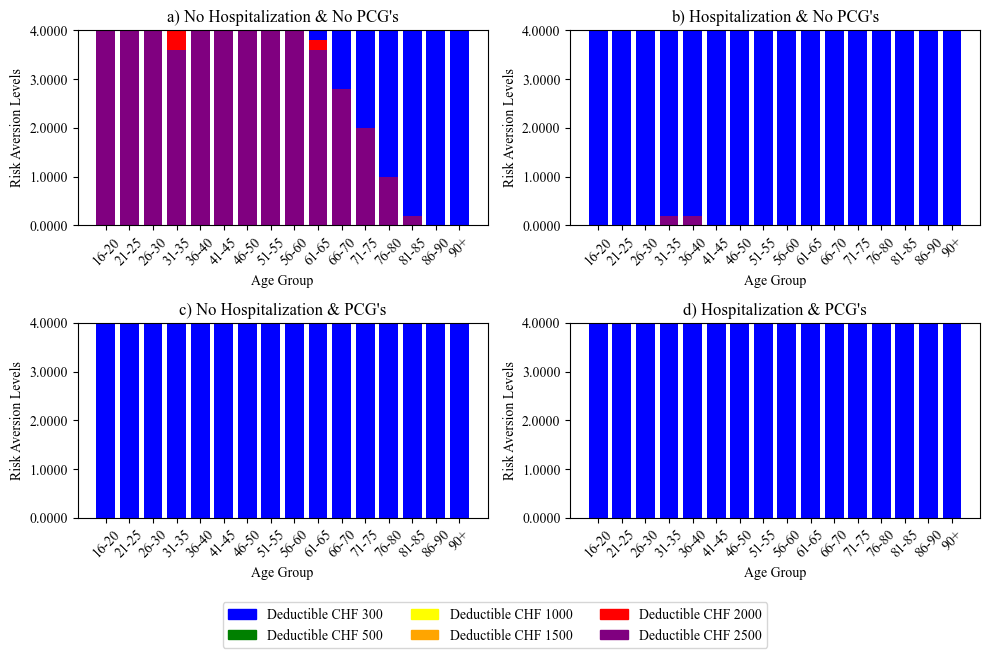

In [19]:
#SIMULATION CRRA EUT WOMEN

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']= 'Times New Roman'
# Define colors for each deductible
colors = {300: 'blue', 500: 'green', 1000: 'yellow', 1500: 'orange', 2000: 'red', 2500: 'purple'}

def plot_optimal_deductibles(results):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    profile_names = list(results.keys())
    profile_titles = ["a) No Hospitalization & No PCG's", "b) Hospitalization & No PCG's", 
                      "c) No Hospitalization & PCG's", "d) Hospitalization & PCG's"]
    
    # Define y-axis ticks for 0.01 steps
    y_ticks = np.arange(0.0, 4.2, 1)
    
    # Iterate over each profile
    for i, profile_name in enumerate(profile_names):
        ax = axs[i // 2, i % 2]
        
        profile_data = results[profile_name]
        age_groups = list(profile_data.keys())
        
        # For each age group, plot the optimal deductible levels across risk aversion levels
        for age_index, age_group in enumerate(age_groups):
            age_group_results = profile_data[age_group]
            bottom = 0  # Start at the lowest risk aversion level
            
            # Iterate through risk aversion levels, grouping by consecutive segments with the same deductible
            current_deductible = None
            segment_start = 0
            
            for j in range(len(age_group_results)):
                risk_aversion, optimal_deductible = age_group_results[j]
                
                # Check if the deductible changes or we are at the last risk aversion level
                if optimal_deductible != current_deductible or j == len(age_group_results) - 1:
                    if current_deductible is not None:
                        # Calculate the height of the segment
                        segment_end = risk_aversion if j < len(age_group_results) - 1 else risk_aversion + (risk_aversions[1] - risk_aversions[0])
                        height = segment_end - segment_start
                        
                        # Plot the segment
                        ax.bar(age_index, height, bottom=segment_start, color=colors[current_deductible], edgecolor="none")
                        segment_start = segment_end
                    
                    # Update the current deductible
                    current_deductible = optimal_deductible
            
            # Move up for the next segment
            bottom += height

        # Customize the plot
        ax.set_title(profile_titles[i])
        ax.set_xlabel("Age Group")
        ax.set_ylabel("Risk Aversion Levels")
        ax.set_xticks(range(len(age_groups)))
        ax.set_xticklabels(age_groups, rotation=45)
        ax.set_ylim(0, 0.002)  # Set limit from 0.0000 to 0.0020 for risk aversion levels
        ax.set_yticks(y_ticks)  # Set y-axis ticks to 0.0001 steps
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))  # Format y-axis labels to four decimal places

    # Add a legend outside the subplots
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
    labels = [f'Deductible CHF {ded}' for ded in colors.keys()]
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()

# Call the plot function with the results from calculate_optimal_deductibles
save_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Abbildungen\SimulationCRRAWomen.png'
plot_optimal_deductibles(optimal_deductible_results)


In [20]:
# SIMULATION RDEUT MEN (CRRA)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
coir = 0.10  # Co-insurance rate
cap = 700    # Co-insurance cap
deductibles = [300, 500, 1000, 1500, 2000, 2500]
premiums = [5440, 5300, 4950, 4600, 4250, 3900]
risk_aversions = np.linspace(0, 4, 21)  # Range of CRRA risk aversion levels

# Function to load probabilities from Excel
def load_probabilities(file_path):
    profiles = {}
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name, index_col=0)  # Read each sheet with age groups as the index
        profiles[sheet_name] = df  # Store the entire dataframe for each profile
    return profiles

# Functions for calculating out-of-pocket costs, wealth, CRRA utility, expected utility, and finding optimal deductible
def calculate_oopc(mhc, deductible):
    return min(mhc, deductible + (mhc - deductible) * coir, deductible + cap)

def calculate_wealth(initial_wealth, premium, mhc, deductible):
    oopc = calculate_oopc(mhc, deductible)
    return initial_wealth - (premium + oopc)

def crra_utility(wealth, risk_aversion):
    """
    Calculate CRRA utility given wealth and risk aversion parameter.
    
    Parameters:
    wealth (float): The individual's wealth.
    risk_aversion (float): The CRRA risk aversion parameter (b).
    
    Returns:
    float: The utility value.
    """
    if risk_aversion == 1:
        return np.log(wealth)  # Log utility case when b = 1
    else:
        return (wealth**(1 - risk_aversion) - 1) / (1 - risk_aversion)

def expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion):
    """
    Calculate the expected utility using CRRA utility.
    """
    utilities = []
    
    for mhc, prob in zip(health_costs, probabilities):
        # Calculate out-of-pocket costs using the formula min(mhc, d + (mhc - d) * 0.1, d + 700)
        out_of_pocket = min(mhc, deductible + (mhc - deductible) * 0.1, deductible + cap)
        
        # Calculate wealth after insurance costs: initial_wealth - premium - out_of_pocket
        wealth = initial_wealth - premium - out_of_pocket
        
        # Calculate CRRA utility based on remaining wealth
        utility = crra_utility(wealth, risk_aversion)
        
        # Weight by probability and add to utilities list
        utilities.append(prob * utility)
    
    # Return the sum of weighted utilities, which is the expected utility
    return sum(utilities)

def find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities):
    """
    Find the deductible that maximizes expected CRRA utility for a given risk aversion level.
    """
    optimal_deductible = None
    max_utility = -np.inf
    for deductible, premium in zip(deductibles, premiums):
        utility = expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion)
        if utility > max_utility:
            max_utility = utility
            optimal_deductible = deductible
    return optimal_deductible

# Function to calculate optimal deductibles and return results
def calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000):
    results = {}  # Dictionary to store results
    
    for profile_name, df in profiles.items():
        profile_results = {}
        
        for age_group in df.index:
            probabilities = df.loc[age_group].values / 100  # Convert from percentage to probability
            age_group_results = []
            
            for risk_aversion in risk_aversions:
                optimal_deductible = find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities)
                age_group_results.append((risk_aversion, optimal_deductible))
            
            profile_results[age_group] = age_group_results
        
        results[profile_name] = profile_results
    
    return results

# Main execution
file_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Experiment\DataMenPythonSimulationRDEU-0.6.xlsx'
profiles = load_probabilities(file_path)
health_costs = [0, 250, 750, 1500, 3500, 7500, 15000, 35000, 50000]  # Given health cost realizations

# Calculate optimal deductibles with adjustable initial wealth
# You can adjust the initial wealth by providing a different value here.
optimal_deductible_results = calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000)

# Example: Print the results for inspection
for profile_name, profile_data in optimal_deductible_results.items():
    print(f"Profile: {profile_name}")
    for age_group, results in profile_data.items():
        print(f"  Age Group: {age_group}")
        for risk_aversion, deductible in results:
            print(f"    Risk Aversion: {risk_aversion:.4f}, Optimal Deductible: CHF {deductible}")
    print("\n")

Profile: Männer (H0 und C0)
  Age Group: 16-20
    Risk Aversion: 0.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 3.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 3.2000, Optimal Deductible: CHF 2500
 

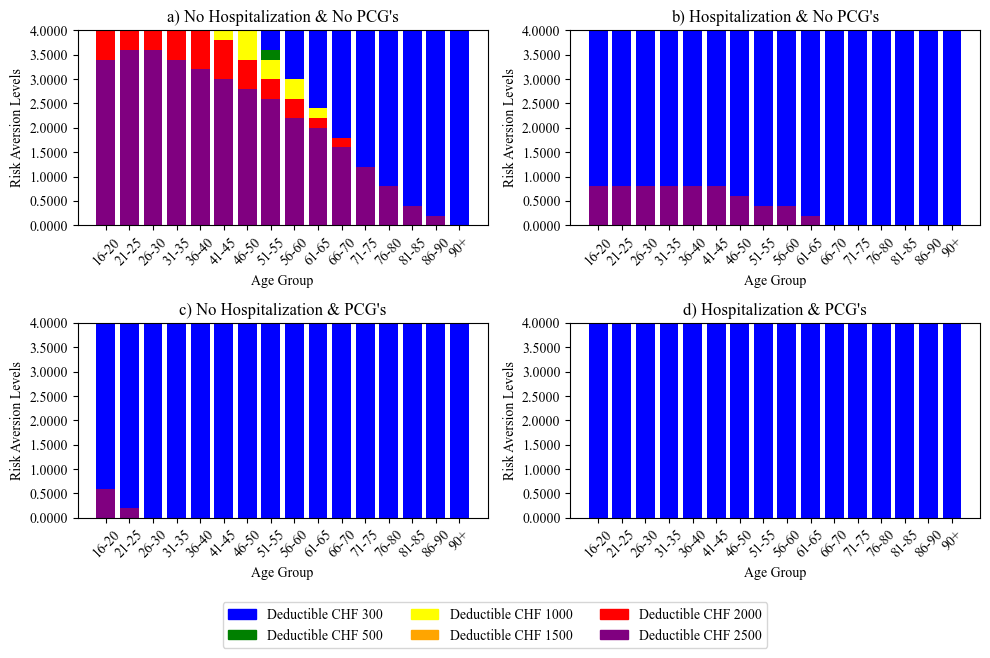

In [21]:
# SIMULATION RDEUT MEN (CRRA)

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']= 'Times New Roman'

# Define colors for each deductible
colors = {300: 'blue', 500: 'green', 1000: 'yellow', 1500: 'orange', 2000: 'red', 2500: 'purple'}

def plot_optimal_deductibles(results):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    profile_names = list(results.keys())
    profile_titles = ["a) No Hospitalization & No PCG's", "b) Hospitalization & No PCG's", 
                      "c) No Hospitalization & PCG's", "d) Hospitalization & PCG's"]
    
    # Define y-axis ticks for 0.01 steps
    y_ticks = np.arange(0.0, 4.2, 0.5)
    
    # Iterate over each profile
    for i, profile_name in enumerate(profile_names):
        ax = axs[i // 2, i % 2]
        
        profile_data = results[profile_name]
        age_groups = list(profile_data.keys())
        
        # For each age group, plot the optimal deductible levels across risk aversion levels
        for age_index, age_group in enumerate(age_groups):
            age_group_results = profile_data[age_group]
            bottom = 0  # Start at the lowest risk aversion level
            
            # Iterate through risk aversion levels, grouping by consecutive segments with the same deductible
            current_deductible = None
            segment_start = 0
            
            for j in range(len(age_group_results)):
                risk_aversion, optimal_deductible = age_group_results[j]
                
                # Check if the deductible changes or we are at the last risk aversion level
                if optimal_deductible != current_deductible or j == len(age_group_results) - 1:
                    if current_deductible is not None:
                        # Calculate the height of the segment
                        segment_end = risk_aversion if j < len(age_group_results) - 1 else risk_aversion + (risk_aversions[1] - risk_aversions[0])
                        height = segment_end - segment_start
                        
                        # Plot the segment
                        ax.bar(age_index, height, bottom=segment_start, color=colors[current_deductible], edgecolor="none")
                        segment_start = segment_end
                    
                    # Update the current deductible
                    current_deductible = optimal_deductible
            
            # Move up for the next segment
            bottom += height

        # Customize the plot
        ax.set_title(profile_titles[i])
        ax.set_xlabel("Age Group")
        ax.set_ylabel("Risk Aversion Levels")
        ax.set_xticks(range(len(age_groups)))
        ax.set_xticklabels(age_groups, rotation=45)
        ax.set_ylim(0, 0.002)  # Set limit from 0.0000 to 0.0020 for risk aversion levels
        ax.set_yticks(y_ticks)  # Set y-axis ticks to 0.0001 steps
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))  # Format y-axis labels to four decimal places

    # Add a legend outside the subplots
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
    labels = [f'Deductible CHF {ded}' for ded in colors.keys()]
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()

# Call the plot function with the results from calculate_optimal_deductibles
save_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Abbildungen\SimulationRDEUTMen.png'
plot_optimal_deductibles(optimal_deductible_results)


In [22]:
# SIMULATION RDEUT WOMEN (CRRA)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
coir = 0.10  # Co-insurance rate
cap = 700    # Co-insurance cap
deductibles = [300, 500, 1000, 1500, 2000, 2500]
premiums = [5440, 5300, 4950, 4600, 4250, 3900]
risk_aversions = np.linspace(0, 4, 21)  # Range of CRRA risk aversion levels

# Function to load probabilities from Excel
def load_probabilities(file_path):
    profiles = {}
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name, index_col=0)  # Read each sheet with age groups as the index
        profiles[sheet_name] = df  # Store the entire dataframe for each profile
    return profiles

# Functions for calculating out-of-pocket costs, wealth, CRRA utility, expected utility, and finding optimal deductible
def calculate_oopc(mhc, deductible):
    return min(mhc, deductible + (mhc - deductible) * coir, deductible + cap)

def calculate_wealth(initial_wealth, premium, mhc, deductible):
    oopc = calculate_oopc(mhc, deductible)
    return initial_wealth - (premium + oopc)

def crra_utility(wealth, risk_aversion):
    """
    Calculate CRRA utility given wealth and risk aversion parameter.
    
    Parameters:
    wealth (float): The individual's wealth.
    risk_aversion (float): The CRRA risk aversion parameter (b).
    
    Returns:
    float: The utility value.
    """
    if risk_aversion == 1:
        return np.log(wealth)  # Log utility case when b = 1
    else:
        return (wealth**(1 - risk_aversion) - 1) / (1 - risk_aversion)

def expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion):
    """
    Calculate the expected utility using CRRA utility.
    """
    utilities = []
    
    for mhc, prob in zip(health_costs, probabilities):
        # Calculate out-of-pocket costs using the formula min(mhc, d + (mhc - d) * 0.1, d + 700)
        out_of_pocket = min(mhc, deductible + (mhc - deductible) * 0.1, deductible + cap)
        
        # Calculate wealth after insurance costs: initial_wealth - premium - out_of_pocket
        wealth = initial_wealth - premium - out_of_pocket
        
        # Calculate CRRA utility based on remaining wealth
        utility = crra_utility(wealth, risk_aversion)
        
        # Weight by probability and add to utilities list
        utilities.append(prob * utility)
    
    # Return the sum of weighted utilities, which is the expected utility
    return sum(utilities)

def find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities):
    """
    Find the deductible that maximizes expected CRRA utility for a given risk aversion level.
    """
    optimal_deductible = None
    max_utility = -np.inf
    for deductible, premium in zip(deductibles, premiums):
        utility = expected_utility(initial_wealth, premium, deductible, health_costs, probabilities, risk_aversion)
        if utility > max_utility:
            max_utility = utility
            optimal_deductible = deductible
    return optimal_deductible

# Function to calculate optimal deductibles and return results
def calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000):
    results = {}  # Dictionary to store results
    
    for profile_name, df in profiles.items():
        profile_results = {}
        
        for age_group in df.index:
            probabilities = df.loc[age_group].values / 100  # Convert from percentage to probability
            age_group_results = []
            
            for risk_aversion in risk_aversions:
                optimal_deductible = find_optimal_deductible(initial_wealth, risk_aversion, health_costs, probabilities)
                age_group_results.append((risk_aversion, optimal_deductible))
            
            profile_results[age_group] = age_group_results
        
        results[profile_name] = profile_results
    
    return results

# Main execution
file_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Experiment\DataWomenPythonSimulationRDEU-0.6.xlsx'
profiles = load_probabilities(file_path)
health_costs = [0, 250, 750, 1500, 3500, 7500, 15000, 35000, 50000]  # Given health cost realizations

# Calculate optimal deductibles with adjustable initial wealth
# You can adjust the initial wealth by providing a different value here.
optimal_deductible_results = calculate_optimal_deductibles(profiles, health_costs, initial_wealth=10000)

# Example: Print the results for inspection
for profile_name, profile_data in optimal_deductible_results.items():
    print(f"Profile: {profile_name}")
    for age_group, results in profile_data.items():
        print(f"  Age Group: {age_group}")
        for risk_aversion, deductible in results:
            print(f"    Risk Aversion: {risk_aversion:.4f}, Optimal Deductible: CHF {deductible}")
    print("\n")

Profile: Männer (H0 und C0)
  Age Group: 16-20
    Risk Aversion: 0.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 0.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.6000, Optimal Deductible: CHF 2500
    Risk Aversion: 1.8000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.0000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.2000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.4000, Optimal Deductible: CHF 2500
    Risk Aversion: 2.6000, Optimal Deductible: CHF 2000
    Risk Aversion: 2.8000, Optimal Deductible: CHF 2000
    Risk Aversion: 3.0000, Optimal Deductible: CHF 300
    Risk Aversion: 3.2000, Optimal Deductible: CHF 300
   

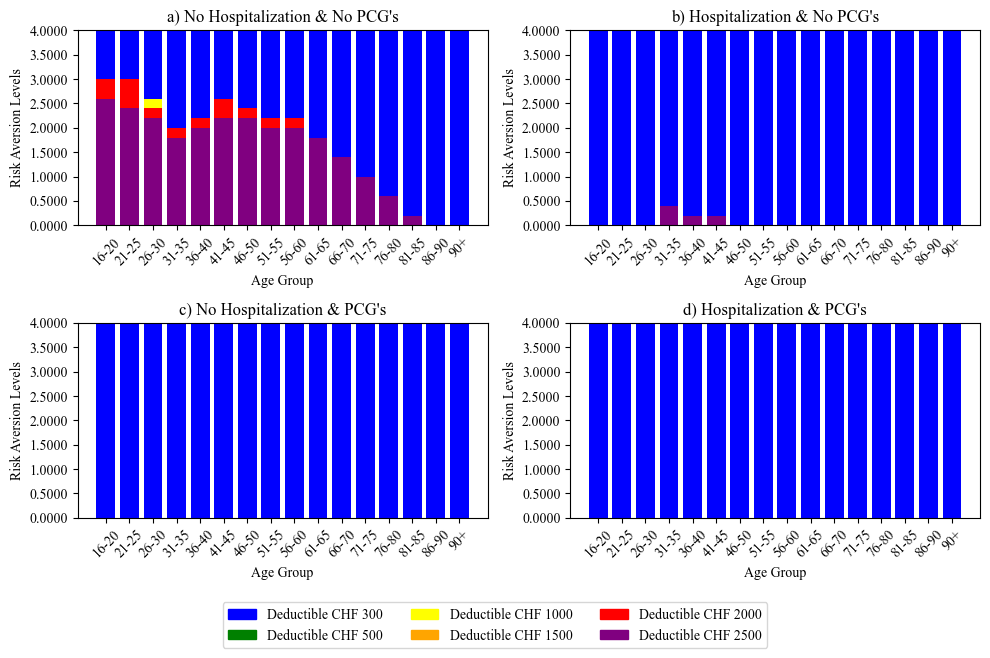

In [23]:
# SIMULATION RDEUT WOMEN (CRRA)

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']= 'Times New Roman'

# Define colors for each deductible
colors = {300: 'blue', 500: 'green', 1000: 'yellow', 1500: 'orange', 2000: 'red', 2500: 'purple'}

def plot_optimal_deductibles(results):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    profile_names = list(results.keys())
    profile_titles = ["a) No Hospitalization & No PCG's", "b) Hospitalization & No PCG's", 
                      "c) No Hospitalization & PCG's", "d) Hospitalization & PCG's"]
    
    # Define y-axis ticks for 0.01 steps
    y_ticks = np.arange(0.0, 4.2, 0.5)
    
    # Iterate over each profile
    for i, profile_name in enumerate(profile_names):
        ax = axs[i // 2, i % 2]
        
        profile_data = results[profile_name]
        age_groups = list(profile_data.keys())
        
        # For each age group, plot the optimal deductible levels across risk aversion levels
        for age_index, age_group in enumerate(age_groups):
            age_group_results = profile_data[age_group]
            bottom = 0  # Start at the lowest risk aversion level
            
            # Iterate through risk aversion levels, grouping by consecutive segments with the same deductible
            current_deductible = None
            segment_start = 0
            
            for j in range(len(age_group_results)):
                risk_aversion, optimal_deductible = age_group_results[j]
                
                # Check if the deductible changes or we are at the last risk aversion level
                if optimal_deductible != current_deductible or j == len(age_group_results) - 1:
                    if current_deductible is not None:
                        # Calculate the height of the segment
                        segment_end = risk_aversion if j < len(age_group_results) - 1 else risk_aversion + (risk_aversions[1] - risk_aversions[0])
                        height = segment_end - segment_start
                        
                        # Plot the segment
                        ax.bar(age_index, height, bottom=segment_start, color=colors[current_deductible], edgecolor="none")
                        segment_start = segment_end
                    
                    # Update the current deductible
                    current_deductible = optimal_deductible
            
            # Move up for the next segment
            bottom += height

        # Customize the plot
        ax.set_title(profile_titles[i])
        ax.set_xlabel("Age Group")
        ax.set_ylabel("Risk Aversion Levels")
        ax.set_xticks(range(len(age_groups)))
        ax.set_xticklabels(age_groups, rotation=45)
        ax.set_ylim(0, 0.002)  # Set limit from 0.0000 to 0.0020 for risk aversion levels
        ax.set_yticks(y_ticks)  # Set y-axis ticks to 0.0001 steps
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.4f}'))  # Format y-axis labels to four decimal places

    # Add a legend outside the subplots
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
    labels = [f'Deductible CHF {ded}' for ded in colors.keys()]
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()

# Call the plot function with the results from calculate_optimal_deductibles
save_path = r'C:\Users\corsi\Documents\Universität\Bachelorarbeit\Abbildungen\SimulationRDEUTWomen.png'
plot_optimal_deductibles(optimal_deductible_results)
